In [1]:
! pip install keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.6 MB/s eta 0:00:0000:0100:01


In [2]:
! pip install nltk
! pip install scikit-learn
! pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 MB 3.6 MB/s eta 0:00:0000:0100:01
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 980.5/980.5 kB 7.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.6/124.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 7.5 MB/s eta 0:00:00a 0:00:01m
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 8.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 7.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 4.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 8.0 MB/s eta 0:00:00a 0:00:01
  Using cached opt_einsum-3.3.0-py

  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 4.4 MB/s eta 0:00:00


In [5]:
! pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 5.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.1/498.1 kB 6.1 MB/s eta 0:00:0000:0100:01


In [24]:
! pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 3.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.8/240.8 kB 3.8 MB/s eta 0:00:00a 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 7.8 MB/s eta 0:00:0000:0100:01


In [3]:
# https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

# Reading and cleaning data

In [10]:
# Read the data using pandas
import pandas as pd
df = pd.read_csv("spam.csv", encoding ='latin1')
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [11]:
# Rename columns, remove unused columns
df.rename(columns={'v1': 'class', 'v2': 'text'}, inplace=True)
drop_columns = [col for col in df.columns if col not in ['class', 'text']]
df.drop(drop_columns, axis=1, inplace=True)
print(df.head())

  class                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [12]:
df.describe()

,class,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
df['class'].value_counts(normalize=True)
# 86.5% of the data belongs to class ham. There is a high class imbalance.

ham     0.865937
spam    0.134063
Name: class, dtype: float64

In [14]:
df["text"] # We see some informal language and extra punctuation. 

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [15]:
from nltk.corpus import stopwords
import string
import random
from nltk.stem.wordnet import WordNetLemmatizer

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join([ch for ch in stop_free if ch not in exclude])
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

data = df.values.tolist()
cleaned_data = [(clean(doc), label) for label, doc in data]
cleaned_data = [(d, l) for d, l in cleaned_data if len(d) > 5]

random.shuffle(cleaned_data)
x = [itm[0] for itm in cleaned_data]
y = [itm[1] for itm in cleaned_data]

In [16]:
from collections import Counter
print(Counter(y))

Counter({'ham': 4764, 'spam': 747})


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

train_x, valid_x, train_y, valid_y = train_test_split(x, y)


# Prepping data before passing through NN models

In [18]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical


MAX_SEQUENCE_LENGTH = 200 
MAX_NB_WORDS = 10000

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(train_x)

train_sequences = tokenizer.texts_to_sequences(train_x)
test_sequences = tokenizer.texts_to_sequences(valid_x)

train_data = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
print("train and test data shapes", train_data.shape, test_data.shape)

#label encoding 
le = LabelEncoder()
le.fit(train_y)
train_labels = le.transform(train_y)
test_labels = le.transform(valid_y)
labels = le.transform(le.classes_)
print(f"{le.classes_=} -> {labels=}")
labels_train = to_categorical(np.asarray(train_labels))
labels_test = to_categorical(np.asarray(test_labels))


train and test data shapes (4133, 200) (1378, 200)
le.classes_=array(['ham', 'spam'], dtype='<U4') -> labels=array([0, 1])


# CNN

In [19]:
# Model training
from keras.layers import (
    Dense,
    Embedding,
    Conv1D,
    MaxPooling1D,
    Flatten,
    Dropout
)
from keras.models import Sequential

EMBEDDING_DIM = 100

print("Training CNN\n")
model = Sequential()
model.add(Embedding(MAX_NB_WORDS,
  EMBEDDING_DIM,
  input_length=MAX_SEQUENCE_LENGTH
))
model.add(Dropout(0.5))

model.add(Conv1D(128, 5, activation="relu"))
model.add(MaxPooling1D(5))
model.add(Dropout(0.5))
model.add(Conv1D(128, 5, activation="relu"))
model.add(MaxPooling1D(5))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.compile(loss="categorical_crossentropy",
  optimizer="rmsprop",
  metrics=["accuracy"]
)
history = model.fit(train_data, labels_train,
  batch_size=64,
  epochs=10,
  validation_data=(test_data, labels_test)
)


Training CNN

Epoch 1/10
65/65 [==============================] - 5s 69ms/step - loss: 0.3872 - accuracy: 0.8679 - val_loss: 0.3135 - val_accuracy: 0.8788
Epoch 2/10
65/65 [==============================] - 4s 66ms/step - loss: 0.1645 - accuracy: 0.9417 - val_loss: 0.1767 - val_accuracy: 0.9630
Epoch 3/10
65/65 [==============================] - 4s 64ms/step - loss: 0.0801 - accuracy: 0.9739 - val_loss: 0.1631 - val_accuracy: 0.9608
Epoch 4/10
65/65 [==============================] - 4s 64ms/step - loss: 0.0558 - accuracy: 0.9852 - val_loss: 0.0991 - val_accuracy: 0.9753
Epoch 5/10
65/65 [==============================] - 4s 63ms/step - loss: 0.0401 - accuracy: 0.9891 - val_loss: 0.0917 - val_accuracy: 0.9775
Epoch 6/10
65/65 [==============================] - 4s 63ms/step - loss: 0.0284 - accuracy: 0.9923 - val_loss: 0.0865 - val_accuracy: 0.9797
Epoch 7/10
65/65 [==============================] - 4s 64ms/step - loss: 0.0207 - accuracy: 0.9937 - val_loss: 0.0905 - val_accuracy: 0.9768

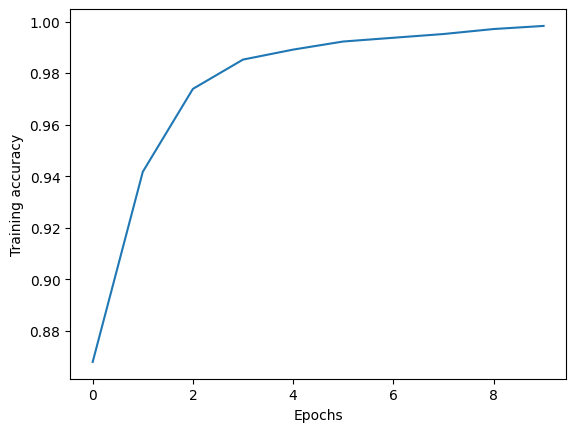

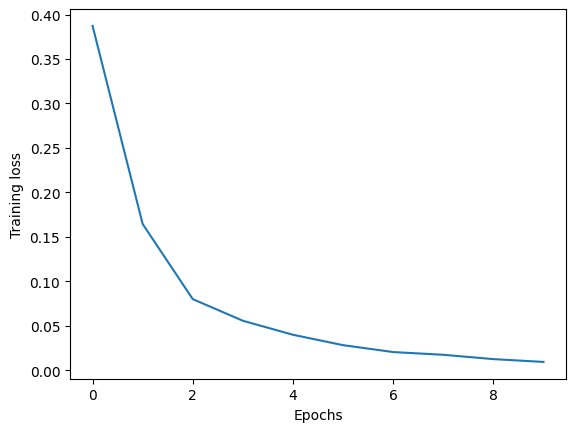

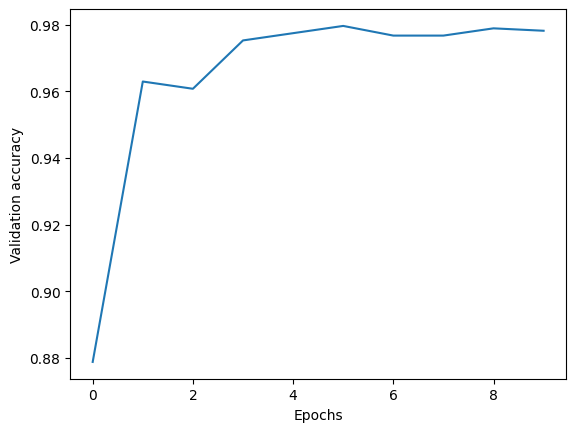

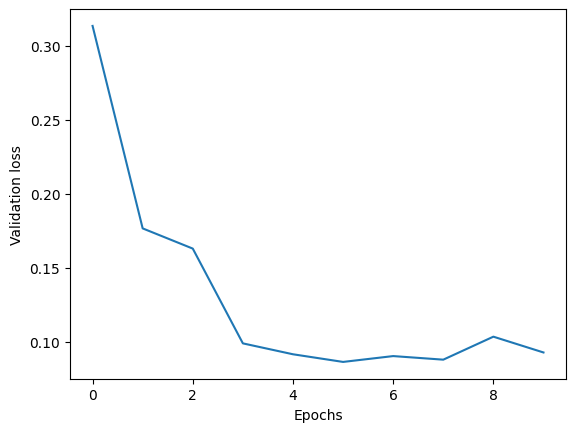

In [20]:
import matplotlib.pyplot as plt
# training data
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Training accuracy")
plt.show()
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Training loss")
plt.show()

# validation data
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Validation accuracy")
plt.show()
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.show()

In [21]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report

predicted = model.predict(test_data)

# evaluation

precision, recall, fscore, _ = score(labels_test, predicted.round())
print(labels, "->", le.classes_)
print(f"{precision=}")
print(f"{recall=}")
print(f"{fscore=}")
print(classification_report(labels_test, predicted.round()))


44/44 [==============================] - 0s 6ms/step
[0 1] -> ['ham' 'spam']
precision=array([0.97981497, 0.96825397])
recall=array([0.99487617, 0.88405797])
fscore=array([0.98728814, 0.92424242])
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1171
           1       0.97      0.88      0.92       207

   micro avg       0.98      0.98      0.98      1378
   macro avg       0.97      0.94      0.96      1378
weighted avg       0.98      0.98      0.98      1378
 samples avg       0.98      0.98      0.98      1378



In [33]:
new_samples = [
    "You have completed your order. Please check your email for a refund receipt for $50.",
    "Win lottery worth $2 Million! click here to participate for free.",
    "Please send me the report by tomorrow morning. Thanks.",
    "You have been selected for a free $500 prepaid card."
]
sample = pad_sequences(
    tokenizer.texts_to_sequences(
        [clean(doc) for doc in new_samples]
    ), 
    maxlen=MAX_SEQUENCE_LENGTH
)
for result in model.predict(sample):
    max_index = np.where(result == max(result))
    print(
        "classification: ", le.classes_[max_index], 
        "scores: ", result
    )

1/1 [==============================] - 0s 21ms/step
classification:  ['ham'] scores:  [0.87511957 0.12488045]
classification:  ['spam'] scores:  [0.0937926  0.90620744]
classification:  ['ham'] scores:  [0.99514043 0.00485962]
classification:  ['spam'] scores:  [0.00934407 0.99065596]
